# Spectral Analysis of Deterministic Signals - Exercises Solution

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Rafael Mejía Zuluaga
## rmejiaz@unal.edu.co

## Short-Time Fourier Transform


The discrete Fourier transform (DFT) is not very well suited for the analysis of instationary signals when applied to the entire signal at once. Furthermore practical signals, for instance, an antenna signal, cannot be analyzed in an on-line manner by the DFT. This motivates to split a long signal into segments and compute the DFT on these segments. This transform is known as the [short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT).

The STFT $X[\mu, n]$ of a signal $x[k]$ is defined as

\begin{equation}
X[\mu, n] = \sum_{k = n}^{n+N-1} x[k] \, w[k-n] \;  \mathrm{e}^{\,-\mathrm{j}\,\frac{2 \pi}{N} k \mu}
\end{equation}

where $w[k]$ denotes a window function of length $N$ which is normalized by $\sum_{k=0}^{N-1} w[k] = 1$. Starting from $k=n$, the signal $x[k]$ is windowed by $w[k]$ to a segment of length $N$. This windowed segment is then transformed by a DFT of length $N$.

The STFT has many applications in digital signal processing, for instance, in the spectral analysis of signals or the processing of instationary signals. The resulting spectrum $X[\mu, n]$ depends on the frequency index $\mu$ and the time index $n$. The spectral domain is therefore also termed as [time-frequency domain](https://en.wikipedia.org/wiki/Time%E2%80%93frequency_representation) and techniques using the STFT as time-frequency processing.

The properties of the STFT depend on

* the length $N$ of the segments,
* the overlap between the segments, and
* the window function $w[k]$.

The size $N$ of the segments and the window function influence the spectral and temporal resolution of the STFT. The time index $n$ of the STFT can be increased by an arbitrary step size. The step size determines the overlap between two consecutive STFTs. For instance, the spectra $X[\mu, n]$ and $X[\mu, n+1]$ have $N-1$ overlapping samples. The overlap is sometimes given as percentage of the segment length $N$.

## The Spectrogram

The magnitude $|X[\mu, n]|$ of the STFT is known as the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) of a signal. It is frequently used to analyze signals in the time-frequency domain, for instance by a [spectrum analyzer](https://en.wikipedia.org/wiki/Spectrum_analyzer).

**Example - Spectrogram of a chirp/sweep signal**

The following example compares the Fourier transform and spectrogram of a [chirp](https://en.wikipedia.org/wiki/Chirp)/sweep signal. A chirp signal is a signal whose instantaneous frequency increases or decreases with time. Lets first listen to a chirp signal whose instantaneous frequency increases linear with time

<audio src="../data/linear_sweep.wav" controls>Your browser does not support the audio element.</audio>
[../data/linear_sweep.wav](../data/linear_sweep.wav)

Now the magnitude spectrum $|X(e^{j \Omega})|$ of a chirp signal is computed and plotted

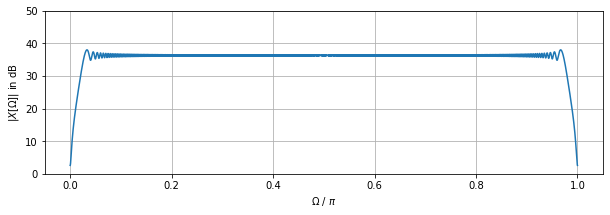

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


N = 8192  # length of the signal

# generate signal
k = np.arange(N)
x = sig.chirp(k, 0.01, N, .49)

# compute and plot magnitude spectrum
plt.figure(figsize = (10, 3))
f = np.fft.rfftfreq(N, 1/2)
plt.plot(f, 20*np.log10(abs(np.fft.rfft(x))))
plt.xlabel(r'$\Omega$ / $\pi$')
plt.ylabel(r'$|X[\Omega]|$ in dB')
plt.ylim([0, 50])
plt.grid()

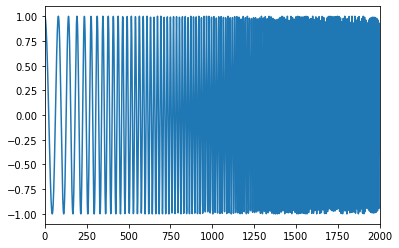

In [12]:
plt.plot(x)
plt.xlim([0,2000])
plt.show()

Followed by the spectrogram of the chirp signal

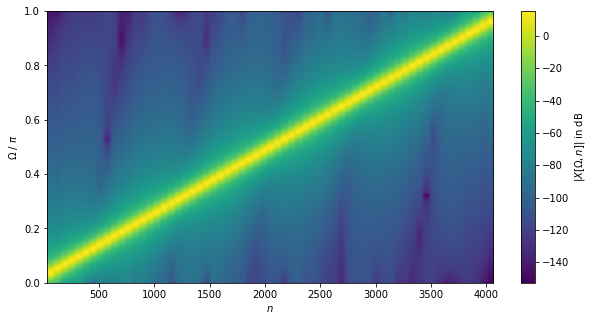

In [13]:
L = 256  # length of one segment
overlap = 128  # overlap between segments

plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)

**Exercise**

* Which spectral properties of the chirp signal can be concluded from the magnitude spectrum and the spectrogram?
* Change the segment length `L` of the spectrogram and the overlap `overlap` between segments. Rerun the example. What changes?
* Change the window function used for the spectrogram by extending the call to `plt.specgram` by the parameter `window`. For instance add `window = np.ones(L)` for the rectangular window.

Solution: The magnitude spectrum, which has been computed from the entire signal, shows only that the overall spectrum of the chirp is approximately constant. The temporal evolution of the instantaneous frequency of the chirp signal can only be observed in the spectrogram. It can be concluded that the instantaneous frequency increases linear with time. A higher segment length leads to a narrower main lobe and thus better visibility of the current frequency. With a higher overlap, the spectrum has a higher temporal resolution.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Only one segment is calculated since parameter NFFT (=8192) >= signal length (=8192).


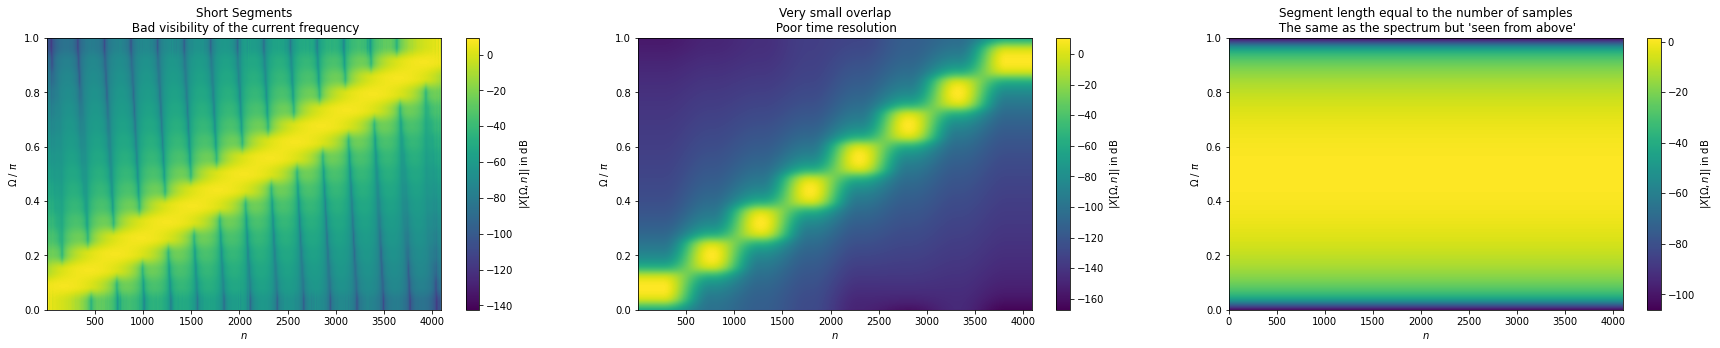

In [56]:
L = 32  # length of one segment
overlap = 31  # overlap between segments

plt.figure(figsize = (30, 5))
plt.subplot(131)
plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
plt.title("Short Segments\n Bad visibility of the current frequency")
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)


L = 1024  # length of one segment
overlap = 2  # overlap between segments

plt.subplot(132)
plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
plt.title("Very small overlap\n Poor time resolution")
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)


L = 8192  # length of one segment
overlap = 0  # overlap between segments

plt.subplot(133)
plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
plt.title("Segment length equal to the number of samples\n The same as the spectrum but 'seen from above'")
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)


With the magnitude of the spectrum we can tell that the signal is composed by a superposition of many frequencies with equal contribution. We see that the spectrum is almost a constant. What we can't see however is the behavior over time. This is what the spectogram reveals, the instantaneous frequency of the signal increase linearly over time.

A larger segment is better for the identification of the frequency, because the main lobe of the spectrum is narrower (as seen in the [leakage effect notebook](https://colab.research.google.com/drive/1rjKSf3I1Hv_it-GVBzRWnPxSzqpa33Cb?usp=sharing))

On the other hand, a larger overlap increases the time resolution. With no overlap at all, the amount of time segments is given by $\frac{N}{L} = \frac{Total\ number\ of\ samples}{Segment\ length}$

Now, we try multiple windows:

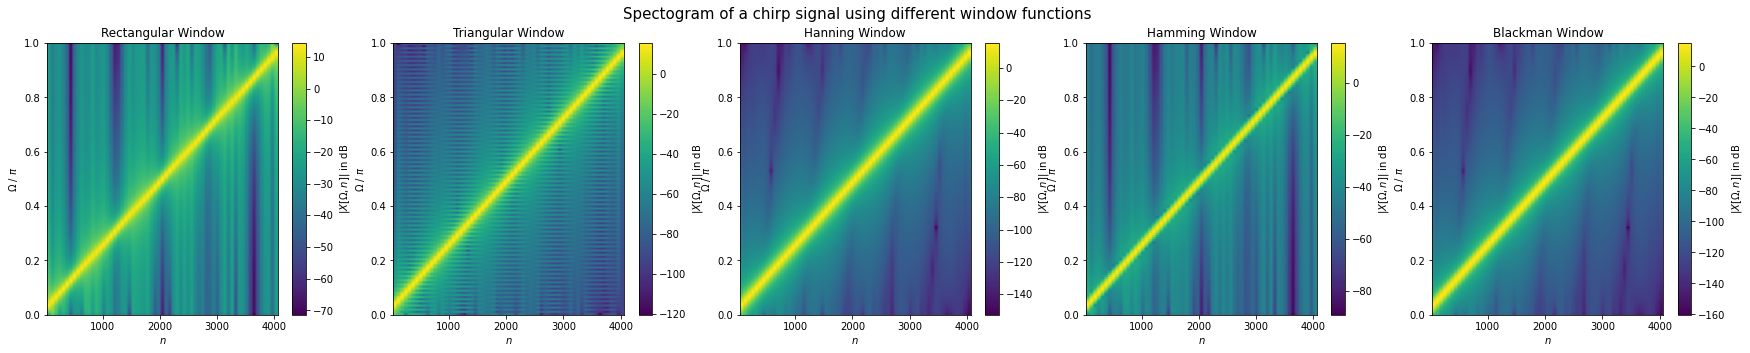

In [62]:
L = 256  # length of one segment
overlap = 128  # overlap between segments

windows = {"Rectangular":np.ones(L),
           "Triangular":sig.triang(L),
           "Hanning": np.hanning(L),
           "Hamming": np.hamming(L),
           "Blackman": np.blackman(L)}
plt.figure(figsize=(30,5))
plt.suptitle("Spectogram of a chirp signal using different window functions",fontsize=15)
i = 1
for window in windows:


  plt.subplot(1,5,i)
  i+=1
  plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided', window=windows[window])
  plt.xlabel(r'$n$')
  plt.ylabel(r'$\Omega$ / $\pi$')
  plt.title(f"{window} Window")
  cb = plt.colorbar()
  cb.set_label(r'$|X[\Omega,n]|$ in dB')
  plt.autoscale(tight=True)

We can clearly see the effect of the side lobes when the rectangular windowing is applied, completely different to the blackman window, where the side lobes have no effect at all. See the [Window functions notebook](https://colab.research.google.com/drive/1WuyQzMK8ehWmdbvVZpgEs6BpWJZMIeZU?usp=sharing) 

**Example - Spectrogram of a speech signal**

The following example computes the spectrogram of a speech signal containing a short sentence. Lets first listen to the speech signal

<audio src="../data/speech_8k.wav" controls>Your browser does not support the audio element.</audio>
[../data/speech_8k.wav](../data/speech_8k.wav)


The signal is loaded using the [`soundfile`](http://pysoundfile.readthedocs.io/en/latest/) module for Python.

In [3]:
#cargar datos desde drive acceso libre
FILEID = "14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-03 21:15:44--  https://docs.google.com/uc?export=download&confirm=&id=14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X
Resolving docs.google.com (docs.google.com)... 74.125.139.139, 74.125.139.113, 74.125.139.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.139.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-a8-docs.googleusercontent.com/docs/securesc/kh4alcr8eqs2apthk8abmflmsvfko7kh/kh544tsg1ecdcaq6rckv2pvn4k4v43ph/1601759700000/09173029842254050324/13934411785841797865Z/14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X?e=download [following]
--2020-10-03 21:15:44--  https://doc-08-a8-docs.googleusercontent.com/docs/securesc/kh4alcr8eqs2apthk8abmflmsvfko7kh/kh544tsg1ecdcaq6rckv2pvn4k4v43ph/1601759700000/09173029842254050324/13934411785841797865Z/14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X?e=download
Resolving doc-08-a8-docs.googleusercontent.com (doc-08-a8-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to

In [7]:
!pip install --upgrade soundfile

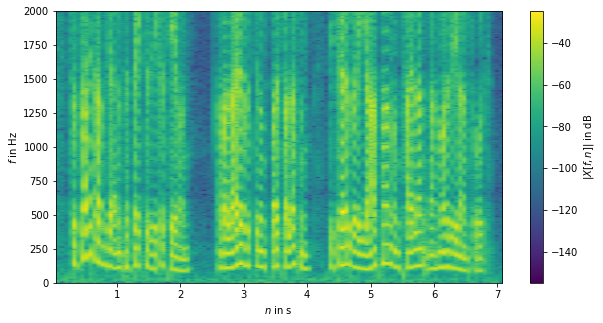

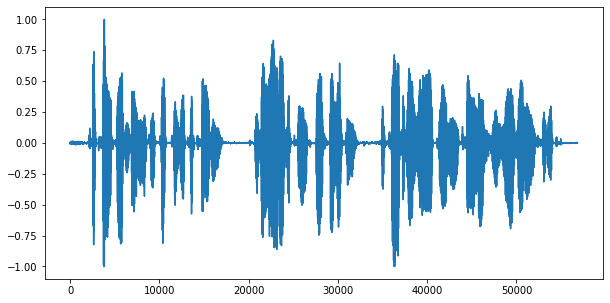

In [68]:
import soundfile as sf

L = 1024  # length of one segment
overlap = 512  # overlap between segments

# read speech signal from file
x, fs = sf.read('data/speech_8k.wav')
x = x/np.max(np.abs(x))

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar()
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)
plt.ylim([0, 2000]);
plt.show()


plt.figure(figsize = (10, 5))
plt.plot(x)
plt.show()

## Play audio files in colaboratory:

In [67]:
from IPython.display import Audio
Audio(x,rate=fs)

### We can also compute the spectogram with scipy.signal and plot it with matplotlib

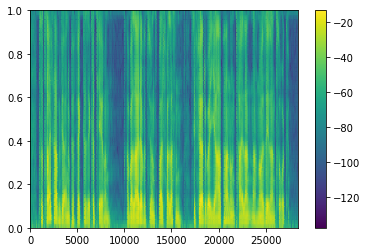

In [9]:
from scipy import signal
f, t, Zxx = signal.stft(x, fs=2, nperseg=100)
Zm = 20*np.log10(np.abs(Zxx))
plt.pcolormesh(t, f, Zm, vmin=Zm.min(), vmax=Zm.max(), shading='gouraud')
plt.colorbar()
plt.show()

**Exercise**

* A speech signal exhibits a specific spectral structure. What insights can you gain from the spectrum above?
* Change the segment length and overlap of the STFT. How does the spectrogram change?

Solution: In case of a vowel a speech signal is periodic due to the underlying speech production mechanism. A periodic signal has a line spectrum consisting of a fundamental frequency and various harmonics with multiple of the fundamental frequency. The [harmonic structure of the vowels](https://en.wikipedia.org/wiki/Formant) is visible in the spectrogram.

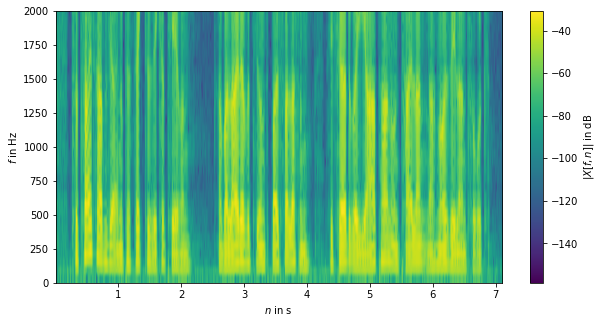

In [76]:
import soundfile as sf

L = 128  # length of one segment
overlap = 64  # overlap between segments

# read speech signal from file
x, fs = sf.read('data/speech_8k.wav')
x = x/np.max(np.abs(x))

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar()
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)
plt.ylim([0, 2000]);
plt.show()
Audio(x,rate=fs)

When we decrease the segment length significantly, we can appreciate empty segments of time. That is presumably the time between words (this is, as stated before bad for the recognition of frequencies). Following this reasoning, we should be able to identify the spectral properties of different words or vowels. In the spectogram we can identify the harmoinic structure of the vowels, which consist of a fundamental frequency and and various harmonics with multiple of the fundamental frequency.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.